In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [3]:
#defining the sequential model for multiclass classification
model = keras.Sequential()

In [4]:
# Defining the CNN layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [5]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('dataset/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('dataset/flowers/test', batch_size=64, target_size=(100,100))


Found 3113 images belonging to 5 classes.
Found 1210 images belonging to 5 classes.


In [6]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

Epoch 1/8
49/49 [==============================] - 98s 2s/step - loss: 143.7049 - accuracy: 0.2408 - val_loss: 1.5030 - val_accuracy: 0.3512
Epoch 2/8
49/49 [==============================] - 32s 662ms/step - loss: 1.3228 - accuracy: 0.4554 - val_loss: 1.2922 - val_accuracy: 0.4802
Epoch 3/8
49/49 [==============================] - 38s 768ms/step - loss: 1.0446 - accuracy: 0.6017 - val_loss: 1.3070 - val_accuracy: 0.4636
Epoch 4/8
49/49 [==============================] - 36s 744ms/step - loss: 0.7693 - accuracy: 0.7058 - val_loss: 1.3192 - val_accuracy: 0.5107
Epoch 5/8
49/49 [==============================] - 39s 794ms/step - loss: 0.5627 - accuracy: 0.8102 - val_loss: 1.4178 - val_accuracy: 0.4860
Epoch 6/8
49/49 [==============================] - 35s 713ms/step - loss: 0.3767 - accuracy: 0.8859 - val_loss: 1.6120 - val_accuracy: 0.4860
Epoch 7/8
49/49 [==============================] - 32s 661ms/step - loss: 0.2352 - accuracy: 0.9355 - val_loss: 1.8055 - val_accuracy: 0.5107
Epoch 8

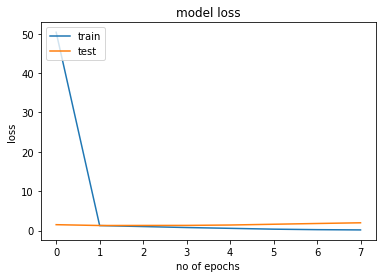

In [7]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

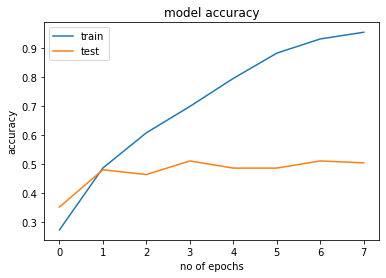

In [8]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [9]:
#save the model
model.save('models/flower_baseline_model.h5')

In [11]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [ ]:
# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}